In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
df = pd.read_csv('taxonomy_species_metadata_biomass_merged.csv', index_col=0)
df.head()

,Sample date,Sample ID,Plot,ID,Nitrogen,Water,Block,Direction,Barcode,Notes,...,Glomus sp. 3,Glomus sp. 4,Pacispora scintillans,Paraglomus brasilianum,Paraglomus laccatum,Redeckera fulvum,Scutellospora nodosa,Scutellospora pellucida,Scutellospora projecturata,Scutellospora spinosissima
barcode53B,2021-06-15,2N,2N,111.0,Low,High,1,N,53.0,NxW_B library,...,13.425569,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,52.007834,0.0
barcode65B,2021-06-15,2S,2S,111.0,Low,High,1,S,65.0,NxW_B library,...,0.000000,0.0,3918.755032,0.000000,0.00000,13.179038,0.0,24.524424,45.840968,0.0
barcode72B,2021-06-15,23S,23S,211.0,Low,High,2,S,72.0,NxW_B library,...,28.658340,0.0,0.000000,38.251551,43.59947,0.000000,0.0,26.747810,0.000000,0.0
barcode81B,2021-06-15,23N,23N,211.0,Low,High,2,N,81.0,NxW_B library,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0
barcode55B,2021-06-15,32N,32N,311.0,Low,High,3,N,55.0,NxW_B library,...,0.000000,0.0,11.081030,31.590360,38.35696,19.312906,0.0,29.028538,22.754466,0.0


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


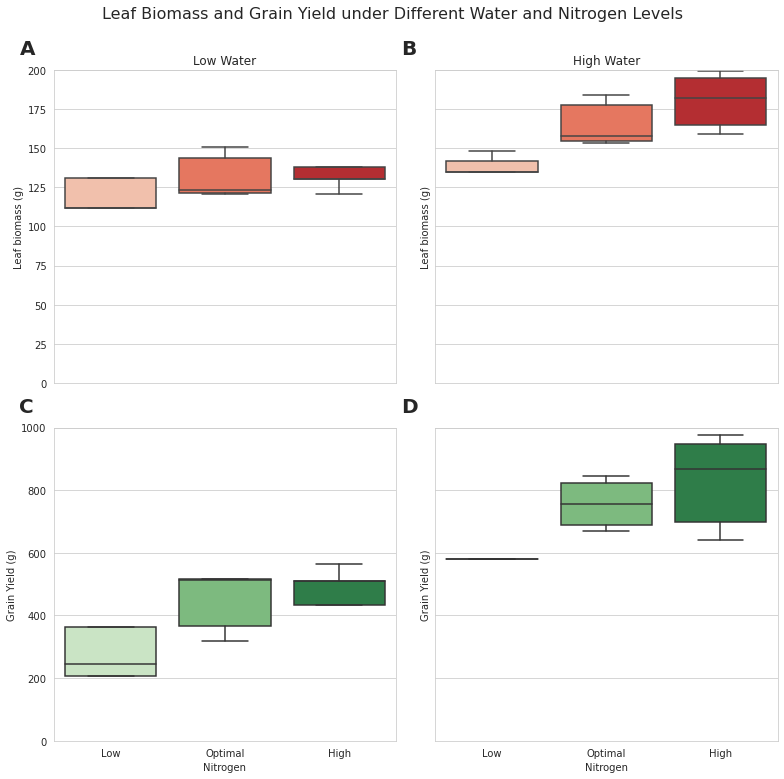

In [5]:
# Set the style to a seaborn default style
sns.set_style("whitegrid")

# Filter data for the date '2021-09-23'
df_filtered = df[df['Sample date'] == '2021-09-23']

# Create a new column for ratio of 'Grain 0% MC' to 'Stems'
df_filtered['Ratio'] = df_filtered['Grain 0% MC'] / df_filtered['Stems']

# Arrange 'Water' levels in desired order: ['Low', 'High']
water_values = ['Low', 'High']

# Create 2x2 subplots, sharing y axis for each row and x axis for each column
fig, axs = plt.subplots(2, 2, figsize=(11, 11), sharey='row', sharex='col')

# Define subplot letters
letters = ['A', 'B', 'C', 'D']

for idx, water in enumerate(water_values):
    # Filter data for current 'Water' value
    df_water = df_filtered[df_filtered['Water'] == water]

    # Create boxplot for 'Ratio' on the first row
    sns.boxplot(x='Nitrogen', y='Leaves', data=df_water, ax=axs[0, idx], palette='Reds')
    axs[0, idx].text(-0.1, 1.05, letters[idx], transform=axs[0, idx].transAxes, size=20, weight='bold')
    axs[0, idx].set_ylabel("Leaf biomass (g)")
    axs[0, idx].set_xlabel('') # remove x-label from the top two subplots

    # Create boxplot for 'Grain Yield, 0% MC kg/ha' on the second row
    sns.boxplot(x='Nitrogen', y='Grain 0% MC', data=df_water, ax=axs[1, idx], palette='Greens')
    axs[1, idx].text(-0.1, 1.05, letters[idx+2], transform=axs[1, idx].transAxes, size=20, weight='bold')
    axs[1, idx].set_ylabel("Grain Yield (g)")

# Setting individual titles for columns
axs[0, 0].set_title('Low Water')
axs[0, 0].set_ylim(0, 200)
axs[0, 1].set_title('High Water')
axs[1, 0].set_ylim(0, 1000)

# Setting main title for the whole figure
fig.suptitle('Leaf Biomass and Grain Yield under Different Water and Nitrogen Levels', fontsize=16)

plt.tight_layout()
# Adjusting space from the top for the main title
fig.subplots_adjust(top=0.90)

# Save the plot
plt.savefig('../../Fungal manuscript/Figures/Figure 1.jpg', bbox_inches='tight', dpi=300)

In [7]:
set(df['Sample date'])

{'2021-06-15', '2021-06-30', '2021-07-27', '2021-08-10', '2021-09-23'}

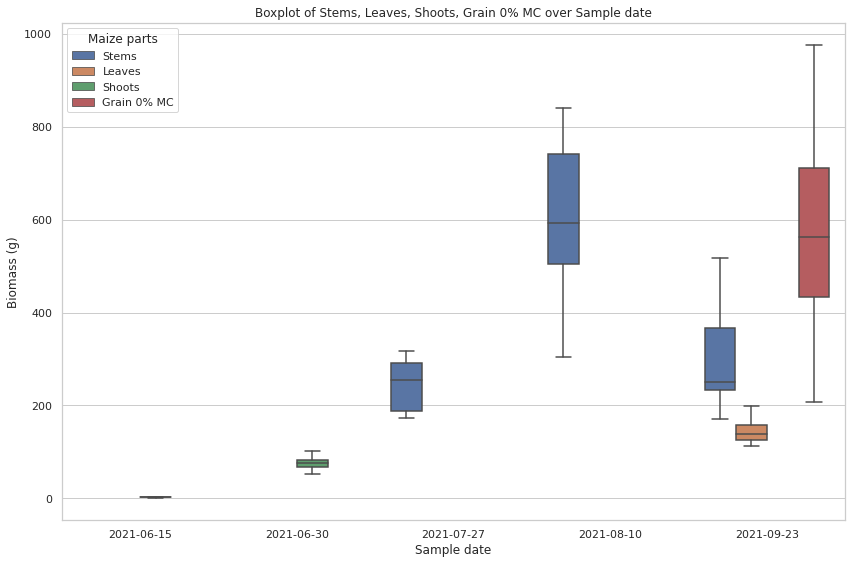

In [6]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Convert 'Sample date' to datetime if it's not already (optional, depending on the format)
# df['Sample date'] = pd.to_datetime(df['Sample date'])

# Define a list of the columns to plot
columns_to_plot = ['Stems', 'Leaves', 'Shoots', 'Grain 0% MC']

# Melt the DataFrame to have the columns_to_plot as value variables
df_melted = df.melt(id_vars=['Sample date'], value_vars=columns_to_plot)
df_melted = df_melted.rename(columns = {'variable': 'Maize parts'})

# Create a boxplot with shared x-axis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sample date', y='value', hue='Maize parts', data=df_melted)

plt.xlabel('Sample date')
plt.ylabel('Biomass (g)')
plt.title('Boxplot of Stems, Leaves, Shoots, Grain 0% MC over Sample date')

plt.tight_layout()
plt.savefig('../../Fungal manuscript/Figures/Supplemental_figure_2.jpg', bbox_inches = 'tight', dpi = 300)

In [7]:
# Convert 'Sample date' to datetime if it's not already (optional, depending on the format)
# df['Sample date'] = pd.to_datetime(df['Sample date'])

# Filter the DataFrame for the specific date
df_filtered = df[df['Sample date'] == '2021-09-23']

# Define the columns for which you want to calculate the statistics
columns_of_interest = ['Stems', 'Leaves', 'Shoots', 'Grain 0% MC']

# Calculate mean, standard deviation, minimum, and maximum
summary_stats = df_filtered[columns_of_interest].agg(['mean', 'std', 'min', 'max']).transpose()
summary_stats.rename(columns={'mean': 'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

print(summary_stats)


                   Mean  Standard Deviation  Minimum  Maximum
Stems        294.642258           97.840206   171.55   516.37
Leaves       146.225806           25.565223   112.00   199.00
Shoots              NaN                 NaN      NaN      NaN
Grain 0% MC  573.743548          215.389497   207.54   974.76


In [19]:
from scipy.stats import mannwhitneyu

# Filter the DataFrame for the specific date
df_filtered = df[df['Sample date'] == '2021-09-23']

# Loop through the variables of interest
for variable in ['Leaves', 'Grain 0% MC']:
    # Loop through the factors of interest
    for factor in ['Nitrogen', 'Water']:
        # Get the unique levels of the factor
        levels = df_filtered[factor].unique()
        # Compare the two levels using the Mann-Whitney U test
        group1 = df_filtered[df_filtered[factor] == levels[0]][variable]
        group2 = df_filtered[df_filtered[factor] == levels[1]][variable]
        stat, p = mannwhitneyu(group1, group2)
        print(f"Mann-Whitney U test for {variable} with factor {factor}, p-value: {p}")

Mann-Whitney U test for Leaves with factor Nitrogen, p-value: 0.016531897667290886
Mann-Whitney U test for Leaves with factor Water, p-value: 7.218072042233618e-06
Mann-Whitney U test for Grain 0% MC with factor Nitrogen, p-value: 0.024187563127837423
Mann-Whitney U test for Grain 0% MC with factor Water, p-value: 1.1207601201010876e-06


In [20]:
from scipy.stats import kruskal

# Filter the DataFrame for the specific date
df_filtered = df[df['Sample date'] == '2021-09-23']

# Create an interaction column combining 'Nitrogen' and 'Water'
df_filtered['Nitrogen_Water'] = df_filtered['Nitrogen'].astype(str) + '_' + df_filtered['Water'].astype(str)

# Loop through the variables of interest
for variable in ['Leaves', 'Grain 0% MC']:
    # Extract the groups based on the interaction of 'Nitrogen' and 'Water'
    groups = [group[variable].values for name, group in df_filtered.groupby('Nitrogen_Water')]
    # Perform the Kruskal-Wallis test
    stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis test for {variable} with interaction between Nitrogen and Water, p-value: {p}")


Kruskal-Wallis test for Leaves with interaction between Nitrogen and Water, p-value: 0.00023719152681813397
Kruskal-Wallis test for Grain 0% MC with interaction between Nitrogen and Water, p-value: 7.808169051987107e-05


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
